In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

if not os.path.exists('/content/drive/MyDrive/single_eye/watermark_full'):
    os.makedirs('/content/drive/MyDrive/single_eye/watermark_full')
if not os.path.exists('/content/drive/MyDrive/single_eye/watermark_iris'):
    os.makedirs('/content/drive/MyDrive/single_eye/watermark_iris')

In [ ]:
!pip install invisible-watermark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image

# Convert jpg to png
im = Image.open(r'/content/drive/MyDrive/single_eye/PNG/C15_S1_I8_L.jpg')
im.save(r'/content/drive/MyDrive/single_eye/PNG/C15_S1_I8_L.png')

In [ ]:
import cv2
from imwatermark import WatermarkEncoder

image = cv2.imread('/content/drive/MyDrive/single_eye/PNG/C15_S1_I8_L.png')
wm = 'test'

encoder = WatermarkEncoder()
encoder.set_watermark('bytes', wm.encode('utf-8'))
watermark = encoder.encode(image, 'dwtDct')

cv2.imwrite('/content/drive/MyDrive/single_eye/watermark_full/C15_S1_I8_L_w.png', watermark)

True

In [ ]:
from numpy.core.numeric import array_equal
if array_equal(image, watermark):
  print("Array Equal.")
else:
  print("Array Different.")

Array Different.


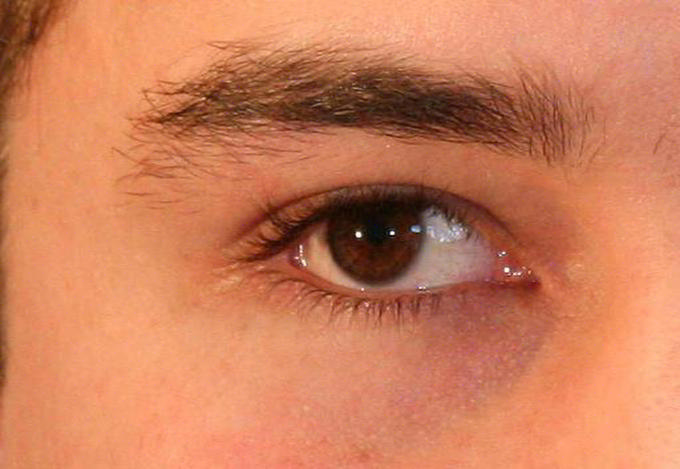

In [ ]:
from google.colab.patches import cv2_imshow

# Watermarked image 
image_w = cv2.imread('/content/drive/MyDrive/single_eye/watermark_full/C15_S1_I8_L_w.png')
# Show image
cv2_imshow(image_w)

In [ ]:
import numpy as np

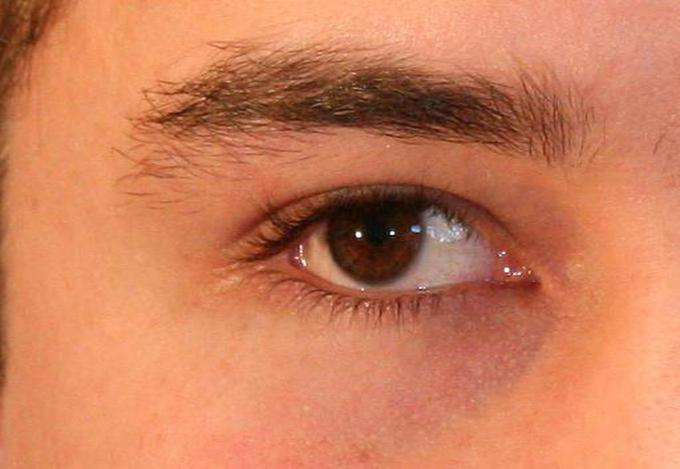

(469, 680, 3)


In [ ]:
# Original image
image = cv2.imread('/content/drive/MyDrive/single_eye/PNG/C15_S1_I8_L.png')
cv2_imshow(image)
image = np.array(image)
print(image.shape)

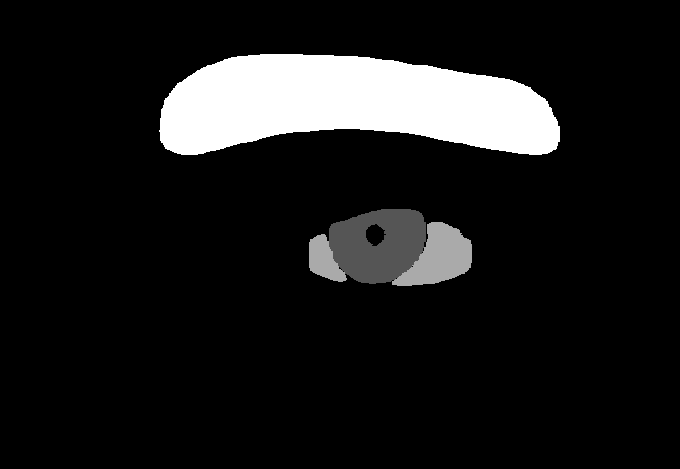

[  0  85 170 255]


In [ ]:
# Original image
mask = cv2.imread('/content/drive/MyDrive/single_eye/Mask/C15_S1_I8_L.png')
cv2_imshow(mask)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
mask = np.array(mask)
print(np.unique(mask))
# print(mask)

In [ ]:
mask = np.where(mask == 85, True, False)
# cv2_imshow(mask)

In [ ]:
image = image.reshape(-1, 3)
mask = mask.reshape(-1)
image_w = image_w.reshape(-1, 3)
# print(image, mask)

In [ ]:
idx = np.where(mask)
print(idx)

(array([142501, 142502, 142503, ..., 192813, 192814, 192815]),)


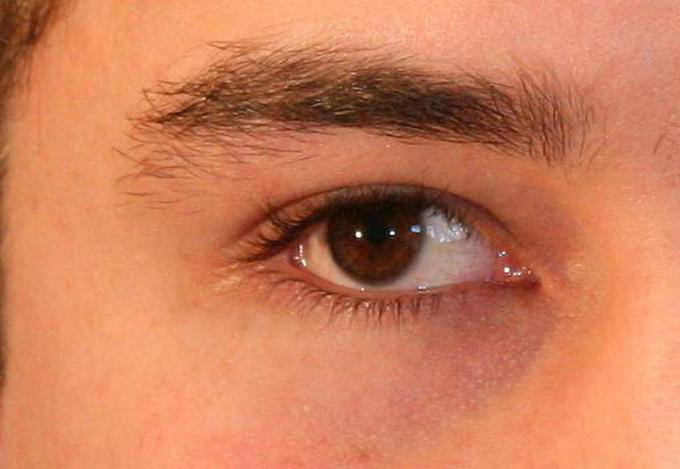

In [ ]:
image[idx] = image_w[idx]
image = image.reshape(469, 680, 3)

# Replace original iris to watermarked iris
cv2_imshow(image)
im.save(r'/content/drive/MyDrive/single_eye/watermark_iris/C15_S1_I8_L_wi.png')